In [1]:
cd /Users/audreyli/Documents/University/Test

/Users/audreyli/Documents/University/Test


In [2]:
import pandas as pd
import numpy as np

# Turns the result of the sentiment analysis into a DataFrame, focusing solely
# on date and sentiment polarity.

sentiment_data= pd.read_csv('WORK Final_individual_polarity_dataset.csv', delimiter= ",", header=None)
sentiment_data.columns= ["Tweet No", "Date", "Polarity"]

display(sentiment_data)

,Tweet No,Date,Polarity
0,NaN,Date,Polarity
1,0.0,2020-01-04,0.2166666666666666
2,2.0,2020-01-06,-0.1212121212121212
3,3.0,2020-01-08,0.0
4,5.0,2020-01-08,0.1363636363636363
...,...,...,...
73830,716960.0,2020-01-31,0.0
73831,716961.0,2020-01-31,0.1363636363636363
73832,716962.0,2020-01-31,0.0
73833,716963.0,2020-01-31,0.1363636363636363


In [3]:
# Cleans up the DataFrame in preparation for visualization

sentiment_data= sentiment_data.drop([0])
sentiment_data["Polarity"]= pd.to_numeric(sentiment_data["Polarity"], downcast="float")
display(sentiment_data)

,Tweet No,Date,Polarity
1,0.0,2020-01-04,0.216667
2,2.0,2020-01-06,-0.121212
3,3.0,2020-01-08,0.000000
4,5.0,2020-01-08,0.136364
5,6.0,2020-01-08,0.090909
...,...,...,...
73830,716960.0,2020-01-31,0.000000
73831,716961.0,2020-01-31,0.136364
73832,716962.0,2020-01-31,0.000000
73833,716963.0,2020-01-31,0.136364


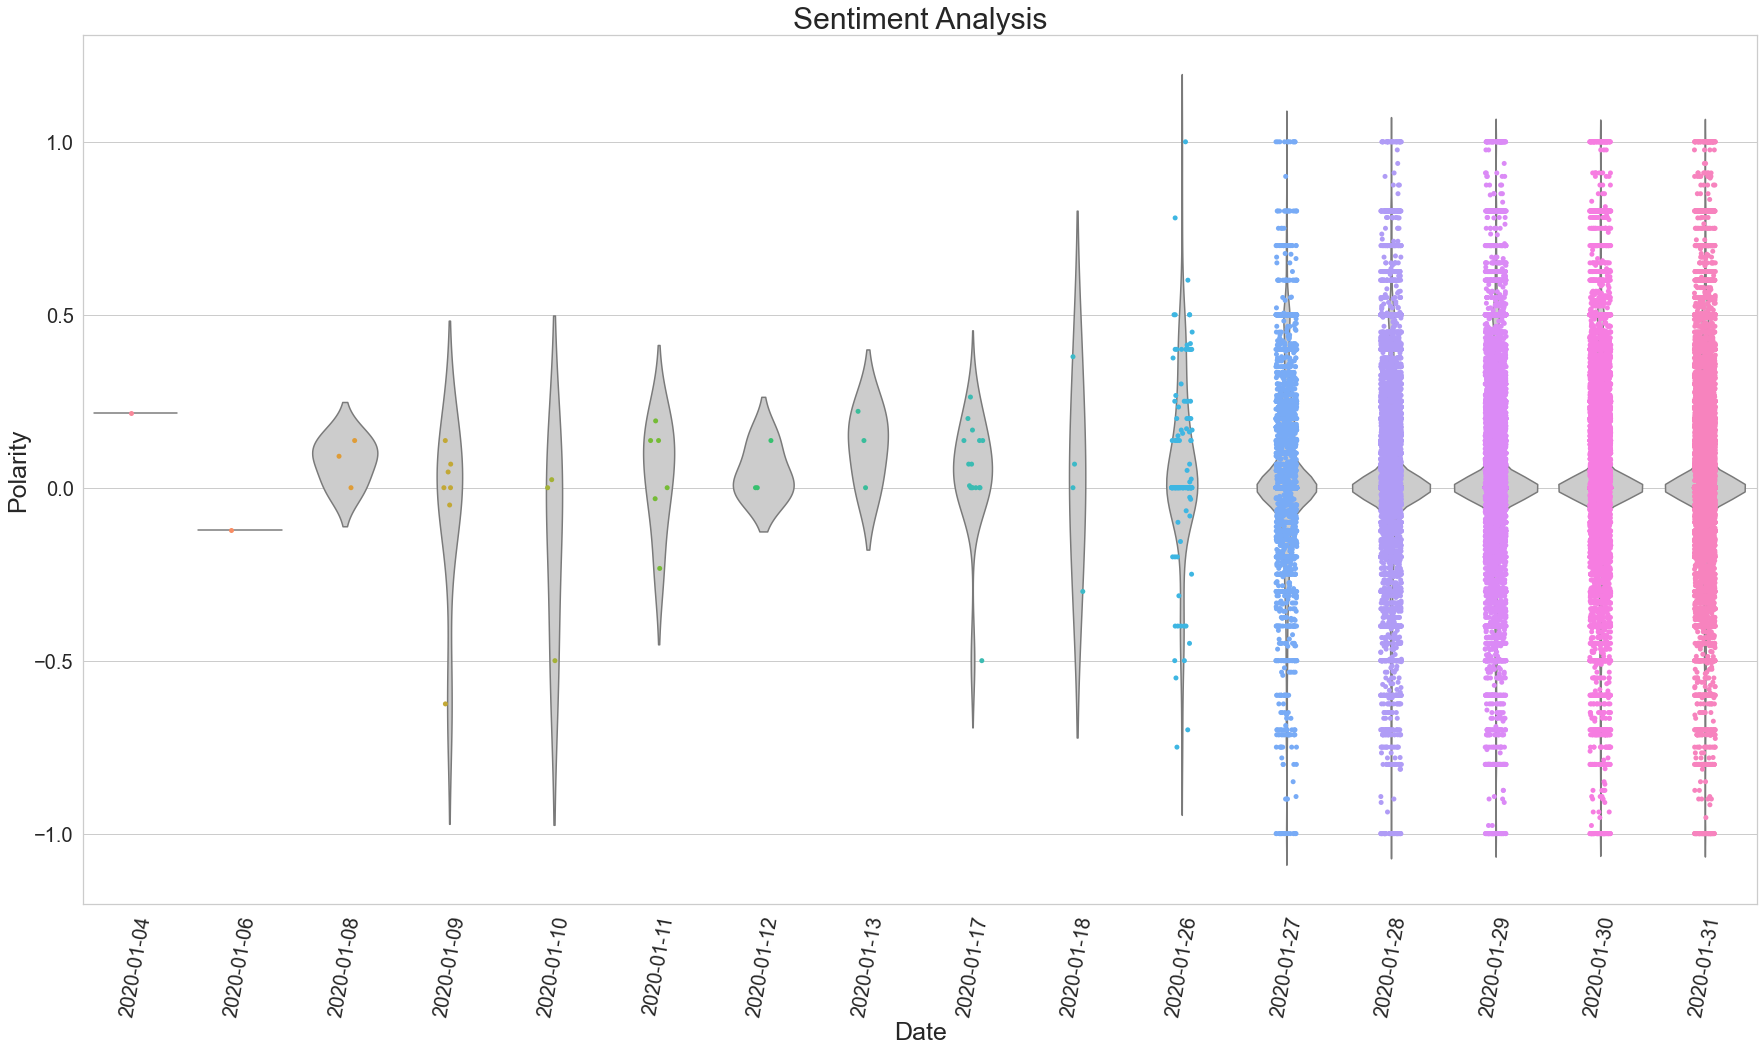

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creates a combined violinplot and stripplot to show the sentiment polarity of tweets where
# sentiment data is available, divided by day.  Note: because of the available data, this
# plot only displays dates in January where the tweets were able to be analyzed for sentiment.

sns.set_theme(style="whitegrid")
plt.figure(figsize=(30,16))
graph_2= sns.violinplot(x="Date", y="Polarity", data=sentiment_data, inner=None, color=".8")
graph_2= sns.stripplot(x="Date", y="Polarity", data=sentiment_data)
plt.xticks(rotation=80, size=20)
plt.yticks(size=20)
plt.xlabel("Date", size=25)
plt.ylabel("Polarity", size=25)
plt.title("Sentiment Analysis", size=30)
plt.show()

In [14]:
# Takes the daily average of sentiment polarity and turns it in a DataFrame

average_sentiment= pd.read_csv('WORK polarity_per_day.csv', delimiter= ",", header=None)
average_sentiment.columns= ["Date", "Polarity"]
average_sentiment["Polarity"]= pd.to_numeric(average_sentiment["Polarity"], downcast="float")

display(average_sentiment)

,Date,Polarity
0,2020-01-01,NaN
1,2020-01-02,NaN
2,2020-01-03,NaN
3,2020-01-04,0.216667
4,2020-01-05,NaN
5,2020-01-06,-0.121212
6,2020-01-07,NaN
7,2020-01-08,0.075758
8,2020-01-09,-0.060714
9,2020-01-10,-0.158923


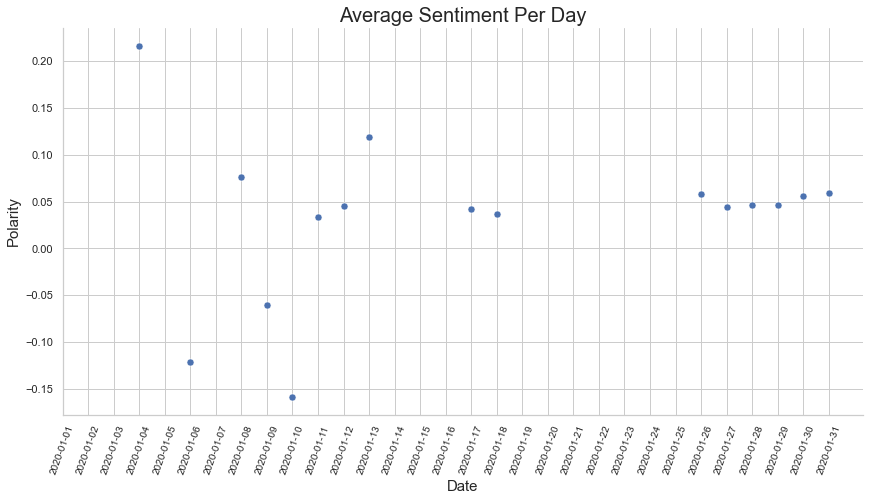

In [15]:
# Creates a scatterplot showing the average sentiment of tweets for each day in
# January where there were available tweets to analyze for sentiment.  Dates with 
# missing markers indicate dates where there was no data available.

average= sns.relplot(x="Date", y="Polarity", s=50, data=average_sentiment, height=6, aspect=2)
average.set_xticklabels(rotation=70, size=10)
average.set_xlabels("Date", size=15)
average.set_ylabels("Polarity", size=15)
plt.title("Average Sentiment Per Day", size=20)
plt.show()